## What the important is not the arrival point, it is the journey itself. Enjoy your journey :)

# Including 
* Single-Particle Theta and Real Space Hopping Phases
* Essential First Band Approximation Functions

In [1]:
using NBInclude; using LinearAlgebra; using Plots; using DataFrames
@nbinclude("../Hofstadter Single Particle in Theta Space.ipynb")
@nbinclude("../../First Band Approximation Functions.ipynb")
# @nbinclude("../../../../Julia/Chern_utils.ipynb");

exp_list1 (generic function with 1 method)

# Initial Parameters

In [2]:
# Lattice Size
Nx=3; Ny=3

# Magnetic Flux Per Plaquet
p=1; q=Ny

# Total Particle Number
# NON-INTERACTING CASE:
# PN = 1

# INTERACTING CASE
PN = [0, 1, 2]

# Cut-Off for Sub-Space (Full Space for now...)
cut_off = 3

# Interaction Potential
U = 0

# Theta Parameter Space
T_size = 15;

# Single Particle Operator

In [3]:
function Sp_Op(Nx, Ny, p, q, Tx, Ty)

    N=Nx*Ny
    sp_basis = NLevelBasis(N) 
    alpha = p/q
    H_T = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
    
    H = SparseOperator(sp_basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(sp_basis, m, n)
        end
    end
    
    return H
end

Sp_Op (generic function with 1 method)

In [4]:
E_sp, V_sp = eigenstates(dense(Sp_Op(Nx, Ny, p, q, 0, 0)))
V_sp

9-element Vector{Ket{NLevelBasis{Int64}, Vector{ComplexF64}}}:
 Ket(dim=9)
  basis: NLevel(N=9)
  -0.5236908080315215 + 0.1069745591682153im
  -0.2725592543837004 + 0.1746077693120747im
 -0.31620322366105996 + 0.19498681380751773im
  -0.4311832307247995 - 0.06048931081605267im
  0.09163027764126223 - 0.01620583009467im
 -0.06763321014385974 + 0.2511315536478213im
  -0.4108041862293564 - 0.0168453415386927im
  0.00361802300195956 + 0.19128175427579128im
                  0.0 + 0.0im
 Ket(dim=9)
  basis: NLevel(N=9)
  0.17888721799194074 + 0.06687696286364347im
  0.25586341072642066 + 0.38977721642729274im
  0.04094007872944448 + 0.1953222723922436im
  0.19319021147890783 - 0.30865578020857065im
   0.3038249253548298 + 0.47031953145937194im
  -0.3229002535636492 + 0.07697619273448im
 -0.00126473255614168 - 0.09373244821159452im
  0.17537961582623027 + 0.3323723921968757im
                  0.0 + 0.0im
 Ket(dim=9)
  basis: NLevel(N=9)
  0.05283121635129683 - 0.09150635094610982im
  0.0528

In [5]:
EE_sp, VV_sp = eigen(dense(Sp_Op(Nx, Ny, p, q, 0, 0)).data)
VV_sp

9×9 Matrix{ComplexF64}:
  -0.523691+0.106975im      0.178887+0.066877im   …   0.144338-0.25im
  -0.272559+0.174608im      0.255863+0.389777im       0.144338+0.25im
  -0.316203+0.194987im     0.0409401+0.195322im      -0.288675+1.71752e-17im
  -0.431183-0.0604893im      0.19319-0.308656im      -0.288675+3.20494e-17im
  0.0916303-0.0162058im     0.303825+0.47032im       -0.288675-6.40988e-17im
 -0.0676332+0.251132im       -0.3229+0.0769762im  …  -0.288675+1.71752e-17im
  -0.410804-0.0168453im  -0.00126473-0.0937324im      0.144338+0.25im
 0.00361802+0.191282im       0.17538+0.332372im       0.144338-0.25im
        0.0+0.0im                0.0+0.0im             0.57735+0.0im

# Sub-Space Many-Body

In [6]:
@nbinclude("../Hofstadter MB in Julia.ipynb"; regex=r"#.*executeme")
function sub_H(Nx, Ny, p, q, Tx, Ty, cut_off, PN)

    N=Nx*Ny
    alpha = p/q
    
    # Single Particle Operator
    H1 = Sp_Op(Nx, Ny, p, q, Tx, Ty)
    
    # Sub-States Go on to Cut-Off
    sub_states = get_sub_states(H1, cut_off)
    
    sp_basis = NLevelBasis(N) 
    
    # Sub-Space Basis and Projection Operator
    basis_sub, P, Pt = get_projector_op(sub_states, sp_basis)

    # Single-Particle Sub-Space Operator
    H1_sub = get_subspace_op(H1, P, Pt)

    # Many-Body Sub-Space Bosonic Fock States
    states_mb = bosonstates(basis_sub, PN)     

    # Many-Body Sub-Space Basis
    basis_mb = ManyBodyBasis(basis_sub, states_mb)

    basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(cut_off,PN);
    
    # Kinetic Term of Many-Body Sub-Space Operator
    #H1_MB = get_mb_op(basis_mb, basis_sub, H1_sub)
    H1_MB = get_mb_op(basis_mb, H1_sub)
    H_kin = SparseOperator(basis_cut_mb)
    H_kin.data = H1_MB.data

    # Interaction Term of Many-Body Sub-Space Operator
    H_Int = Hubbard_Interaction(P, Pt, basis_cut_mb, cut_off, U)

    HH = H_kin + H_Int
    
    return HH
end

sub_H (generic function with 1 method)

In [7]:
U = 0

0

In [8]:
cut_off =  Nx*Ny

9

In [9]:
H = (sub_H(Nx, Ny, p, q, 0, 0, cut_off, PN)'+sub_H(Nx, Ny, p, q, 0, 0, cut_off, PN))/2;

In [10]:
E_mb, V_mb = eigenstates(dense(H))
E_mb

55-element Vector{Float64}:
 -5.464101615137772
 -5.4641016151377695
 -5.464101615137754
 -5.464101615137743
 -5.4641016151377375
 -5.464101615137725
 -2.732050807568878
 -2.7320508075688776
 -2.7320508075688763
 -2.000000000000014
 -2.0000000000000084
 -2.0000000000000075
 -2.000000000000002
  ⋮
  2.7320508075688763
  2.7320508075688767
  2.732050807568877
  2.732050807568878
  2.732050807568878
  2.732050807568879
  3.9999999999999973
  3.999999999999999
  3.9999999999999996
  4.0
  4.000000000000001
  4.000000000000002

In [127]:
E, V = eigenstates(dense((H'+H)/2))
pn = maximum(PN)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(cut_off,PN);
filtered_energies = get_filtered_energies(2, E, V, basis_cut_mb)
r_hubbard_states = Restricted_Hubbard_States(V, filtered_energies)
filtered_energies
r_hubbard_states

45-element Vector{Ket{ManyBodyBasis{Vector{Int64}, NLevelBasis{Int64}, 0xb70afca90bca4191, UInt64}, Vector{ComplexF64}}}:
 Ket(dim=55)
  basis: ManyBody(onebodybasis=NLevel(N=9), states:55)
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
 -0.3017797217822814 - 0.10037062225318232im
 0.10159217068176268 + 0.558769829801628im
 0.19897391184427005 - 0.00328934821503964im
                     ⋮
            -3.0e-17 - 2.4e-16im
             5.0e-17 + 6.0e-17im
             1.5e-16 + 4.0e-17im
            -1.6e-16 - 4.1e-16im
            -7.0e-17 + 5.0e-17im
             1.8e-16 - 1.8e-16im
            -9.0e-17 + 2.0e-17im
             1.0e-17 - 1.0e-17im
             3.0e-17 + 1.0e-17im
             3.0e-17 - 1.0e-17im
            -1.0e-17 + 0.0im
     

In [128]:
EE_mb, VV_mb = eigen(dense((sub_H(Nx, Ny, p, q, 0, 0, cut_off, PN)+sub_H(Nx, Ny, p, q, 0, 0, cut_off, PN)')/2).data)
VV_mb[:,1:3]

55×3 Matrix{ComplexF64}:
          0.0+0.0im          …           0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im          …           0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
     -0.30178-0.100371im     …     0.0322441-0.0173893im
     0.101592+0.55877im            -0.103612+0.626825im
     0.198974-0.00328935im         -0.337928-0.490221im
             ⋮               ⋱  
 -3.22192e-17-2.35526e-16im      1.01264e-17-9.4164e-18im
  5.07414e-17+5.79031e-17im      5.59927e-17+3.72744e-17im
  1.46034e-16+3.97064e-17im  …   4.42916e-17-9.68253e-18im
 -1.58027e-16-4.09842e-16im      -2.9335e-18+1.41593e-18im
 -7.15202e-17+5.27586e-17im 

In [11]:
# Mesh Grid for Theta Space Parameter
T_size = 15;
dx=2*pi/T_size; dy=dx;
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

In [12]:
N1 = length(Tx)
    N2 = length(Ty)
    dimH = length(filtered_energies)
    EEA=zeros(N1, N2, dimH)
    UUA=zeros(Complex{Float64}, N1, N2, dimH, dimH)
N1, N2, dimH, size(EEA), size(UUA)

LoadError: UndefVarError: `filtered_energies` not defined

In [13]:
function calc_ALL_STATES(Tx, Ty, Nx, Ny, p, q, cut_off, PN)
    N1 = length(Tx)
    N2 = length(Ty)
    dimH = length(E_mb)
    EEA=zeros(N1, N2, dimH)
    UUA=zeros(Complex{Float64}, N1, N2, dimH, dimH)
    for it1 in 1:N1
        for it2 in 1:N2
            H = (sub_H(Nx, Ny, p, q, Tx[it1], Ty[it2], cut_off, PN)'+sub_H(Nx, Ny, p, q, Tx[it1], Ty[it2], cut_off, PN))/2
            E, V = eigenstates(dense((H'+H)/2))
            EEA[it1,it2,:], UUA[it1,it2,:,:] = eigen(dense( (sub_H(Nx, Ny, p, q, Tx[it1], Ty[it2], cut_off, PN)+sub_H(Nx, Ny, p, q, Tx[it1], Ty[it2], cut_off, PN)')/2 ).data)
        end
    end
    return EEA, UUA
end

calc_ALL_STATES (generic function with 1 method)

In [14]:
EEA, UUA = calc_ALL_STATES(Tx, Ty, Nx, Ny, p, q, cut_off, PN);

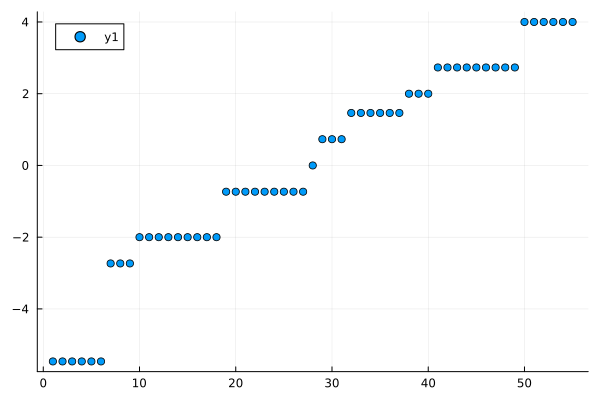

In [15]:
scatter(EEA[1,1,:])

In [18]:
function calc_link_var(ψ1, ψ2)
    link_var = det(ψ1'*ψ2)
    return link_var/abs(link_var)
end
function calc_link_var_svd(ψ1, ψ2)
    A = ψ1' * ψ2
    V, Σ, W = svd(A)
    M = V * W'
    ψ1 = ψ2 * M'
    link_var = det(ψ1'*ψ2)
    return link_var/abs(link_var)
end
function calc_link_vars(UUA)
    N1,N2,__ = size(UUA)
    UU = zeros(Complex{Float64}, N1, N2, 2)
    dirs = [ [1, 0], [0,1] ]
    for it1 in 1:N1
        for it2 in 1:N2
            for (idir, vdir) in enumerate(dirs)
                UU[it1,it2,idir] = calc_link_var_svd(UUA[it1,it2,:,:],
                                                 UUA[mod(it1-1+vdir[1],N1)+1,mod(it2-1+vdir[2],N2)+1,:,:])
            end
        end
    end
    return UU 
end
function calc_F12(UU)
    F12 = log.(  UU[:,:,1].*
                circshift(UU[:,:,2],(-1,0))./
               (circshift(UU[:,:,1],(0,-1)).*
                UU[:,:,2]) 
            )
    return F12
end
function calc_chern_bands(UUA, band)
    Chern = []
    F12list = []
    for band in bands
        UU = calc_link_vars(UUA[:,:,:,band[1]:band[2]])
        F12 = calc_F12(UU)
        push!(F12list, F12)
        push!(Chern, sum(F12)/(2im*pi))
    end
    return Chern, F12list
end

calc_chern_bands (generic function with 1 method)

In [19]:
bands = [[1,6]]
Chern, F12 = calc_chern_bands(UUA, bands)
Chern

1-element Vector{Any}:
 -1.3433475525272376e-16 - 7.067899292142031e-17im

In [53]:
for (i,j) in enumerate(4:6)
    println(i,j)
end

14
25
36


In [54]:
#function conv_mat(Nx,Ny,q,n1,n2,V::Matrix{ComplexF64})
function conv_mat(Nx,Ny,q,n1,n2,V)
    v = zeros(Complex{Float64},Nx*Ny,q)
    for (i,j) in enumerate(n1:n2)
        v[:,i]=reshape(V[j].data,Nx*Ny,1)
    end
    return v
end

conv_mat (generic function with 1 method)

In [55]:
# tx=ty=0;dx=dy=1
H = sub_H(Nx, Ny, p, q, tx+dx, ty+dy, cut_off, PN)
#w4, v4 = eigen(dense((H+H')/2).data);v4 = v4[:,n1:n2]
w4, v4 = eigenstates(dense((H+H')/2))
v4 = conv_mat(Nx, Ny, q, 1, 3, v4)

LoadError: UndefVarError: `tx` not defined

# Exact Diagonalization

In [26]:
# using DataFrames

# function get_filtered_energies(pn, basis, H_total)
    
#     # Operator Form of Eigenstates
#     E, V = eigenstates(dense(dense((H_total+H_total')/2)))

#     # Energies According to Each Particle Number
#     PN_Energies = Array{Float64}(undef, length(E), 2)
#     for i in 1:length(E)
#         # Particle Number in Each State
#         PN_Energies[i] = round(expect(number(basis), V[i]))
        
#         # Energies in Each State
#         PN_Energies[i,2] = E[i]
#     end
    
#     # Fiter Process
#     Filtered_Energies = DataFrame(PN_Energies, :auto)
#     Filtered_Energies = filter(row -> (row.x1 == pn),  Filtered_Energies)
    
#     return Filtered_Energies
# end

In [27]:
# # Energies of Filtered Particle Number 
# pn = 1
# df = get_filtered_energies(pn, basis_cut_mb, H_total)
# filtered_energies = Matrix(df)[:,2]

In [28]:
# using Plots

# # Plots Bands
# scatter(1:length(filtered_energies), filtered_energies, legend=false, axis=nothing)

In [29]:
# # Eigen-States of Filtered Particle Number 
# function Filtered_Hubbard_States(filtered_energies, states)
#     number_of_states = length(filtered_energies)
#     return states[:,1:number_of_states]
# end

In [30]:
# pn = 1

# function get_eigenstates(basis_cut_mb, H_total, pn)
    
#     E, V = eigen(dense((H_total+H_total')/2).data)

#     # Sorting Again...
#     #V = V[:, sortperm(E)]
    
#     df = get_filtered_energies(pn, basis_cut_mb, H_total)
    
#     filtered_energies = Matrix(df)[:,2]
    
#     #filtered_states = Filtered_Hubbard_States(filtered_energies, V)
#     #filtered_states = dropcol(V, 4)
    
#     return filtered_energies, V
# end

# # Orthogonality 
# # filtered_energies, filtered_states = get_eigenstates(basis_cut_mb, H_total, pn)
# # for i in 1:N
# #     j = 9
# #     a = filtered_states[:,j]
# #     b = filtered_states[:,i]
# #     println(dot(a,b))
# # end
# Tx = Ty = 0
# H_total = get_total_H(Nx, Ny, alpha, sp_basis, Tx, Ty, cut_off, PN, basis_cut_sp, basis_cut_mb)
# get_eigenstates(basis_cut_mb, H_total, pn)[1]

# CHERN CALCULATION SECTION

In [12]:
# function findcol(M, col)                
#     @inbounds @views for c in axes(M, 2)
#        M[:,c] == col && return c       
#     end                                 
#     return nothing                      
# end
# col = [
#     1.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im;
#  0.0 + 0.0im
# ]
# dropcol(M::AbstractMatrix, j) = M[:, deleteat!(collect(axes(M, 2)), j)];

In [15]:
# Mesh Grid for Theta Space Parameter
T_size = 15;
dx=2*pi/T_size; dy=dx;
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

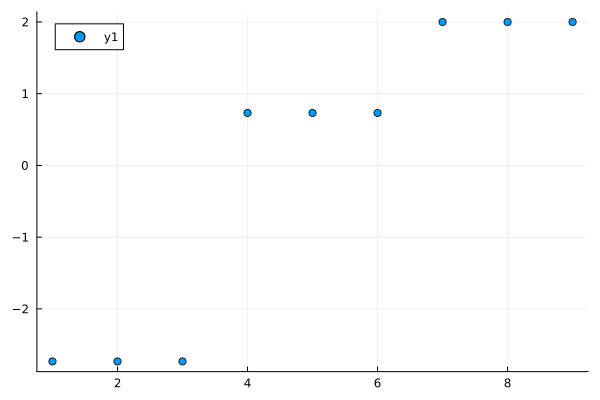

In [16]:
using Plots
scatter(E_mb)

In [16]:
using ProgressMeter
n1=1
n2=3
Sum=0
@showprogress for tx in Tx
    for ty in Ty    
        
        H = sub_H(Nx, Ny, p, q, tx, ty, cut_off, PN)
        #w1, v1 = eigen(dense((H+H')/2).data);v1 = v1[:,n1:n2]
        w1, v1 = eigenstates(dense((H+H')/2))
        v1 = conv_mat(Nx, Ny, q, n1, n2, v1)
        
        H = sub_H(Nx, Ny, p, q, tx+dx, ty, cut_off, PN)
        #w2, v2 = eigen(dense((H+H')/2).data);v2 = v2[:,n1:n2]
        w2, v2 = eigenstates(dense((H+H')/2))
        v2 = conv_mat(Nx, Ny, q, n1, n2, v2)
        
        H = sub_H(Nx, Ny, p, q, tx, ty+dy, cut_off, PN)
        #w3, v3 = eigen(dense((H+H')/2).data);v3 = v3[:,n1:n2]
        w3, v3 = eigenstates(dense((H+H')/2))
        v3 = conv_mat(Nx, Ny, q, n1, n2, v3)

        H = sub_H(Nx, Ny, p, q, tx+dx, ty+dy, cut_off, PN)
        #w4, v4 = eigen(dense((H+H')/2).data);v4 = v4[:,n1:n2]
        w4, v4 = eigenstates(dense((H+H')/2))
        v4 = conv_mat(Nx, Ny, q, n1, n2, v4)
        
        U1 = det(v1'*v2)/abs(det(v1'*v2))
        U2 = det(v2'*v4)/abs(det(v2'*v4))
        U3 = det(v3'*v4)/abs(det(v3'*v4))
        U4 = det(v1'*v3)/abs(det(v1'*v3))

        Sum+=log(U1*U2*1/U3*1/U4)
    end
end
Sum/2*1im*pi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


4.079781671351152e-15 + 7.498917270718558e-15im

In [20]:
function Chern_Nums(Nx, Ny, p, q, Tx, Ty, cut_off, PN, n1, n2)
    
    Sum=0
    pn = maximum(PN)
    for tx in Tx
        for ty in Ty
            
            H = sub_H(Nx, Ny, p, q, tx, ty, cut_off, PN)
            
            w1, v1 = eigen(dense((H+H')/2).data)
            
            # v1 = v1[:, sortperm(w1)]
            
            # if isapprox(v1[1,1], 0+0im, atol=0.001) == false
            #     v1 = v1 ./ v1[1,1]
            #     v1 = v1/norm(v1)
            # end

            # col_idx = findcol(v1, col)
            # v1 = dropcol(v1, col_idx)
            
            filtered_energies = get_filtered_energies(pn, E, V, basis_cut_mb)
            r_hubbard_states = Restricted_Hubbard_States(V, filtered_energies)
            v1 = conv_mat(r_hubbard_states)
            
            v1 = v1[:,n1:n2]
            
            #------------------------------------
            
            H = sub_H(Nx, Ny, p, q, tx+dx, ty, cut_off, PN)
            
            w2, v2 = eigen(dense((H+H')/2).data)
            
            # v2 = v2[:, sortperm(w2)]

            # if isapprox(v2[1,1], 0+0im, atol=0.001) == false
            #     v2 = v2 ./ v2[1,1]
            #     v2 = v2 / norm(v2)
            # end

            # col_idx = findcol(v2, col)
            # v2 = dropcol(v2, col_idx)
            
            v2 = v2[:,n1:n2]
            
            #------------------------------------
            
            H = sub_H(Nx, Ny, p, q, tx, ty+dy, cut_off, PN)
            
            w3, v3 = eigen(dense((H+H')/2).data)
            
            # v3 = v3[:, sortperm(w3)]

            # if isapprox(v3[1,1], 0+0im, atol=0.001) == false
            #     v3 = v3 ./ v3[1,1]
            #     v3 = v3/norm(v3)
            # end

            # col_idx = findcol(v3, col)
            # v3 = dropcol(v3, col_idx)
            
            v3 = v3[:,n1:n2]
            
            #------------------------------------
            
            H = sub_H(Nx, Ny, p, q, tx+dx, ty+dy, cut_off, PN)
            
            w4, v4 = eigen(dense((H+H')/2).data)
            
            # v4 = v4[:, sortperm(w4)]

            # if isapprox(v4[1,1], 0+0im, atol=0.001) == false
            #     v4 = v4 ./ v4[1,1]
            #     v4 = v4/norm(v4)
            # end

            # col_idx = findcol(v4, col)
            # v4 = dropcol(v4, col_idx)
            
            v4 = v4[:,n1:n2]
            
            #----------LINK VARIABLES------------
            
            U1=det(adjoint(v1)*v2)
            U1=U1/abs(U1)
            
            U2=det(adjoint(v2)*v4)
            U2=U2/abs(U2)
            
            U3=det(adjoint(v3)*v4)
            U3=U3/abs(U3)
            
            U4=det(adjoint(v1)*v3)
            U4=U4/abs(U4)
            
            #----------BERRY CURVATURE-----------
            
            F=log(U1*U2*1/U3*1/U4)
            Sum=Sum+F
            
        end
    end
    
    C = 1/(2*pi*1im)*Sum
    
    return C, Sum
end

Chern_Nums (generic function with 1 method)

In [21]:
Nx, Ny, p, q, Tx, Ty, cut_off, PN
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(cut_off,PN);

(3, 3, 1, 3, [0.0, 0.41887902047863906, 0.8377580409572781, 1.2566370614359172, 1.6755160819145563, 2.0943951023931953, 2.5132741228718345, 2.9321531433504733, 3.3510321638291125, 3.7699111843077517, 4.1887902047863905, 4.607669225265029, 5.026548245743669, 5.445427266222308, 5.864306286700947], [0.0, 0.41887902047863906, 0.8377580409572781, 1.2566370614359172, 1.6755160819145563, 2.0943951023931953, 2.5132741228718345, 2.9321531433504733, 3.3510321638291125, 3.7699111843077517, 4.1887902047863905, 4.607669225265029, 5.026548245743669, 5.445427266222308, 5.864306286700947], 9, [0, 1, 2])

In [22]:
C, S = Chern_Nums(Nx, Ny, p, q, Tx, Ty, cut_off, PN, 1,3)

5.579076694477918 - 4.0125711434742177e-17im

# Check with "Hofstadter MB Chern" file

In [69]:
n1 = 1
n2 = 9
tx = ty = 0

0

In [71]:
H = get_total_H(Nx, Ny, alpha, tx, ty, cut_off, PN)

w1, v1 = eigen(dense((H+H')/2).data)

v1 = v1[:, sortperm(w1)]

if isapprox(v1[1,1], 0+0im, atol=0.001) == false
    v1 = v1 ./ v1[1,1]
    v1 = v1/norm(v1)
end

# col_idx = findcol(v1, col)
# v1 = dropcol(v1, col_idx)

v1 = v1[:,n1:n2]

#------------------------------------

H = get_total_H(Nx, Ny, alpha, tx+dx, ty, cut_off, PN)

w2, v2 = eigen(dense((H+H')/2).data)

v2 = v2[:, sortperm(w2)]

if isapprox(v2[1,1], 0+0im, atol=0.001) == false
    v2 = v2 ./ v2[1,1]
    v2 = v2 / norm(v2)
end

# col_idx = findcol(v2, col)
# v2 = dropcol(v2, col_idx)

v2 = v2[:,n1:n2]

#------------------------------------

H = get_total_H(Nx, Ny, alpha, tx, ty+dy, cut_off, PN)

w3, v3 = eigen(dense((H+H')/2).data)

v3 = v3[:, sortperm(w3)]

if isapprox(v3[1,1], 0+0im, atol=0.001) == false
    v3 = v3 ./ v3[1,1]
    v3 = v3/norm(v3)
end

# col_idx = findcol(v3, col)
# v3 = dropcol(v3, col_idx)

v3 = v3[:,n1:n2]

#------------------------------------

H = get_total_H(Nx, Ny, alpha, tx+dx, ty+dy, cut_off, PN)

w4, v4 = eigen(dense((H+H')/2).data)

v4 = v4[:, sortperm(w4)]

if isapprox(v4[1,1], 0+0im, atol=0.001) == false
    v4 = v4 ./ v4[1,1]
    v4 = v4/norm(v4)
end

# col_idx = findcol(v4, col)
# v4 = dropcol(v4, col_idx)

v4 = v4[:,n1:n2]

#----------LINK VARIABLES------------

U1=det(adjoint(v1)*v2)
U1=U1/abs(U1)

U2=det(adjoint(v2)*v4)
U2=U2/abs(U2)

U3=det(adjoint(v3)*v4)
U3=U3/abs(U3)

U4=det(adjoint(v1)*v3)
U4=U4/abs(U4)

#----------BERRY CURVATURE-----------

F=log(U1*U2*1/U3*1/U4)

8.52741319615994e-32 - 4.129748950277714e-16im

In [73]:
eigen(v1)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
9-element Vector{ComplexF64}:
 -0.33171144944039976 + 0.0328424332420734im
 -0.32944251696367644 - 0.050781287180897416im
 -0.31160750339306503 + 0.11837176580693569im
  -0.2689834502969823 + 0.19687309256839067im
 -0.16947438557723316 - 0.2870357882639909im
  0.09547931048700889 + 0.31936626681607505im
   0.2237484943774718 - 0.24707837294050172im
   0.3326247298839208 + 0.02172326358446125im
  0.33331581880936106 - 0.003417022469445724im
vectors:
9×9 Matrix{ComplexF64}:
    0.0773191+0.511891im     …   3.08526e-16+1.62928e-19im
     0.129845-0.56231im          1.64921e-16-1.29095e-16im
     0.631615+0.0im             -1.48585e-16-1.38088e-16im
  -2.3032e-16-4.75835e-16im         0.751813+0.0im
 -2.09388e-17-1.91545e-16im        -0.104663-0.021228im
 -1.77055e-16+3.33217e-16im  …      0.243715+0.603304im
 -4.12767e-16+3.11066e-16im       3.0247e-15-3.14179e-15im
 -2.24324e-16-1.04232e-16im      4.97207e-15-2

In [63]:
PN = 1
tx = 1
ty = 1
#---
H = get_total_H(Nx, Ny, alpha, Tx[tx], Ty[ty], cut_off, PN)     
w1, v1 = eigen(dense((H+H')/2).data)
v1 = v1[:, sortperm(w1)]
# drop_idx = findcol(v1, col)
# v1 = dropcol(v1, drop_idx)
if isapprox(v1[1,1], 0+0im, atol=0.001) == false
    v1 = v1 ./ v1[1,1]
    v1 = v1/norm(v1)
end
v1 = v1[:,n1:n2]
#---
H = get_total_H(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty], cut_off, PN)     
w2, v2 = eigen(dense((H+H')/2).data)
v2 = v2[:, sortperm(w2)]
# drop_idx = findcol(v2, col)
# v2 = dropcol(v2, drop_idx)
v2 = v2[:,n1:n2]
#---
H = get_total_H(Nx, Ny, alpha, Tx[tx], Ty[ty]+dy, cut_off, PN)     
w3, v3 = eigen(dense((H+H')/2).data)
v3 = v3[:, sortperm(w3)]
# drop_idx = findcol(v3, col)
# v3 = dropcol(v3, drop_idx)
v3 = v3[:,n1:n2]
#---
H = get_total_H(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty]+dy, cut_off, PN)     
w4, v4 = eigen(dense((H+H')/2).data)
v4 = v4[:, sortperm(w4)]
# drop_idx = findcol(v4, col)
# v4 = dropcol(v4, drop_idx)
v4 = v4[:,n1:n2]
#---
U1=det(adjoint(v1)*v2)
U1=U1/abs(U1)
U2=det(adjoint(v2)*v4)
U2=U2/abs(U2)
U3=det(adjoint(v3)*v4)
U3=U3/abs(U3)
U4=det(adjoint(v1)*v3)
U4=U4/abs(U4)

0.09998746114914639 - 0.9949886972287413im

In [64]:
w4

9-element Vector{Float64}:
 -2.546639394327162
 -2.5466393943271606
 -2.546639394327156
  0.20750036611082465
  0.20750036611082553
  0.20750036611082567
  2.339139028216335
  2.339139028216336
  2.3391390282163362

In [65]:
v1[:,2:2]

9×1 Matrix{ComplexF64}:
    0.22768685118156337 - 0.09547546849024292im
   -0.09486724412515558 - 0.029938605636929395im
     0.9486625031502366 + 0.17084049202965787im
 1.3877787807814457e-17 + 9.71445146547012e-17im
 -9.020562075079397e-17 + 1.5612511283791264e-17im
   2.42861286636753e-17 - 6.938893903907228e-18im
 -1.734723475976807e-16 + 1.734723475976807e-16im
                    0.0 + 9.367506770274758e-17im
  3.354703270462921e-16 - 0.0im

In [53]:
A = [0.04206576838675055 - 0.4844396754976562im
  -0.11575260100874928 - 0.5048774472308879im
 -0.019490509012952906 - 0.41988073170016393im
   0.08258610549150286 - 0.15124676786746452im
  -0.13712915132022854 - 0.206737076416468im
   0.02043777173323122 - 0.1578183693955im
    0.1675828210222271 - 0.2475088598632606im
  -0.20168809511772048 - 0.2682933538161717im
                   0.0 + 0.0im]

9-element Vector{ComplexF64}:
   0.04206576838675055 - 0.4844396754976562im
  -0.11575260100874928 - 0.5048774472308879im
 -0.019490509012952906 - 0.41988073170016393im
   0.08258610549150286 - 0.15124676786746452im
  -0.13712915132022854 - 0.206737076416468im
   0.02043777173323122 - 0.1578183693955im
    0.1675828210222271 - 0.2475088598632606im
  -0.20168809511772048 - 0.2682933538161717im
                   0.0 + 0.0im

In [58]:
v1[:,4:4] ./ A

9×1 Matrix{ComplexF64}:
 -1.7980148799796905e-16 + 2.6448446692249435e-16im
  3.1046229679841827e-16 + 8.476994294114351e-16im
 -2.5323280801083318e-17 + 1.227685310490113e-16im
      -1.090534299951408 - 0.4449238617579872im
     0.36100073604058036 + 0.09170231699197172im
     -2.7721760625514626 - 5.462498847891495im
   8.007269689386028e-17 + 1.7066629704076275e-16im
   8.099994278116515e-17 - 7.990563131415732e-16im
                     NaN + NaN*im

In [49]:
eigen(v1)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
9-element Vector{ComplexF64}:
  -0.9957553612966031 + 0.09203945050397394im
 -0.42003967852213075 - 0.9075057401840629im
  -0.2605125273634965 + 0.9654704672265649im
 -0.18697876421055862 + 0.9823639558403457im
 -0.16395678044357687 - 0.9864675231078723im
  0.09948476278099364 - 0.9950390856516179im
  0.34409654116713523 - 0.9389342737150541im
   0.5944419686309548 + 0.8041385116571351im
   0.9444051792358245 - 0.32878390689410203im
vectors:
9×9 Matrix{ComplexF64}:
    -0.503198-0.224812im     …   1.60054e-16-8.15074e-17im
    -0.494572+0.291905im         9.05782e-17+7.01495e-17im
     0.605344+0.0im             -1.78743e-16-8.81097e-18im
  4.41479e-16+3.9254e-17im      -2.13933e-16+1.97689e-16im
 -1.69026e-17+7.64161e-17im      2.57639e-16-5.272e-16im
  8.06173e-17+2.73893e-17im  …   1.03897e-16+2.52044e-16im
  1.17364e-16+1.10632e-16im        -0.596552+0.306689im
  3.10486e-16+2.09361e-16im         0.716812